<a href="https://colab.research.google.com/github/razario4/Projectkan/blob/main/Analisa_Data_Penjualan_Produk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

📊 ANALISIS DATA PENJUALAN TOKO ELEKTRONIK
✅ Data berhasil dibuat: 1000 transaksi
📅 Periode: 01 January 2024 - 28 June 2024

📋 INFORMASI DASAR DATA
🔍 5 Data Teratas:
        date      product     category      price  quantity       total  \
0 2024-04-12    Headphone  Accessories   590143.0         3   1770429.0   
1 2024-03-12  Smart Watch  Electronics  3116220.0         2   6232440.0   
2 2024-03-15       Tablet  Electronics  4585882.0         4  18343527.0   
3 2024-04-13       Tablet  Electronics  3232935.0         2   6465870.0   
4 2024-03-28    Headphone  Accessories   587711.0         3   1763132.0   

   month  week  
0  April    15  
1  March    11  
2  March    11  
3  April    15  
4  March    13  

📊 Statistik Deskriptif:
                                date         price     quantity         total  \
count                           1000  1.000000e+03  1000.000000  1.000000e+03   
mean   2024-03-31 01:01:55.200000256  4.542961e+06     2.626000  1.218411e+07   
min           

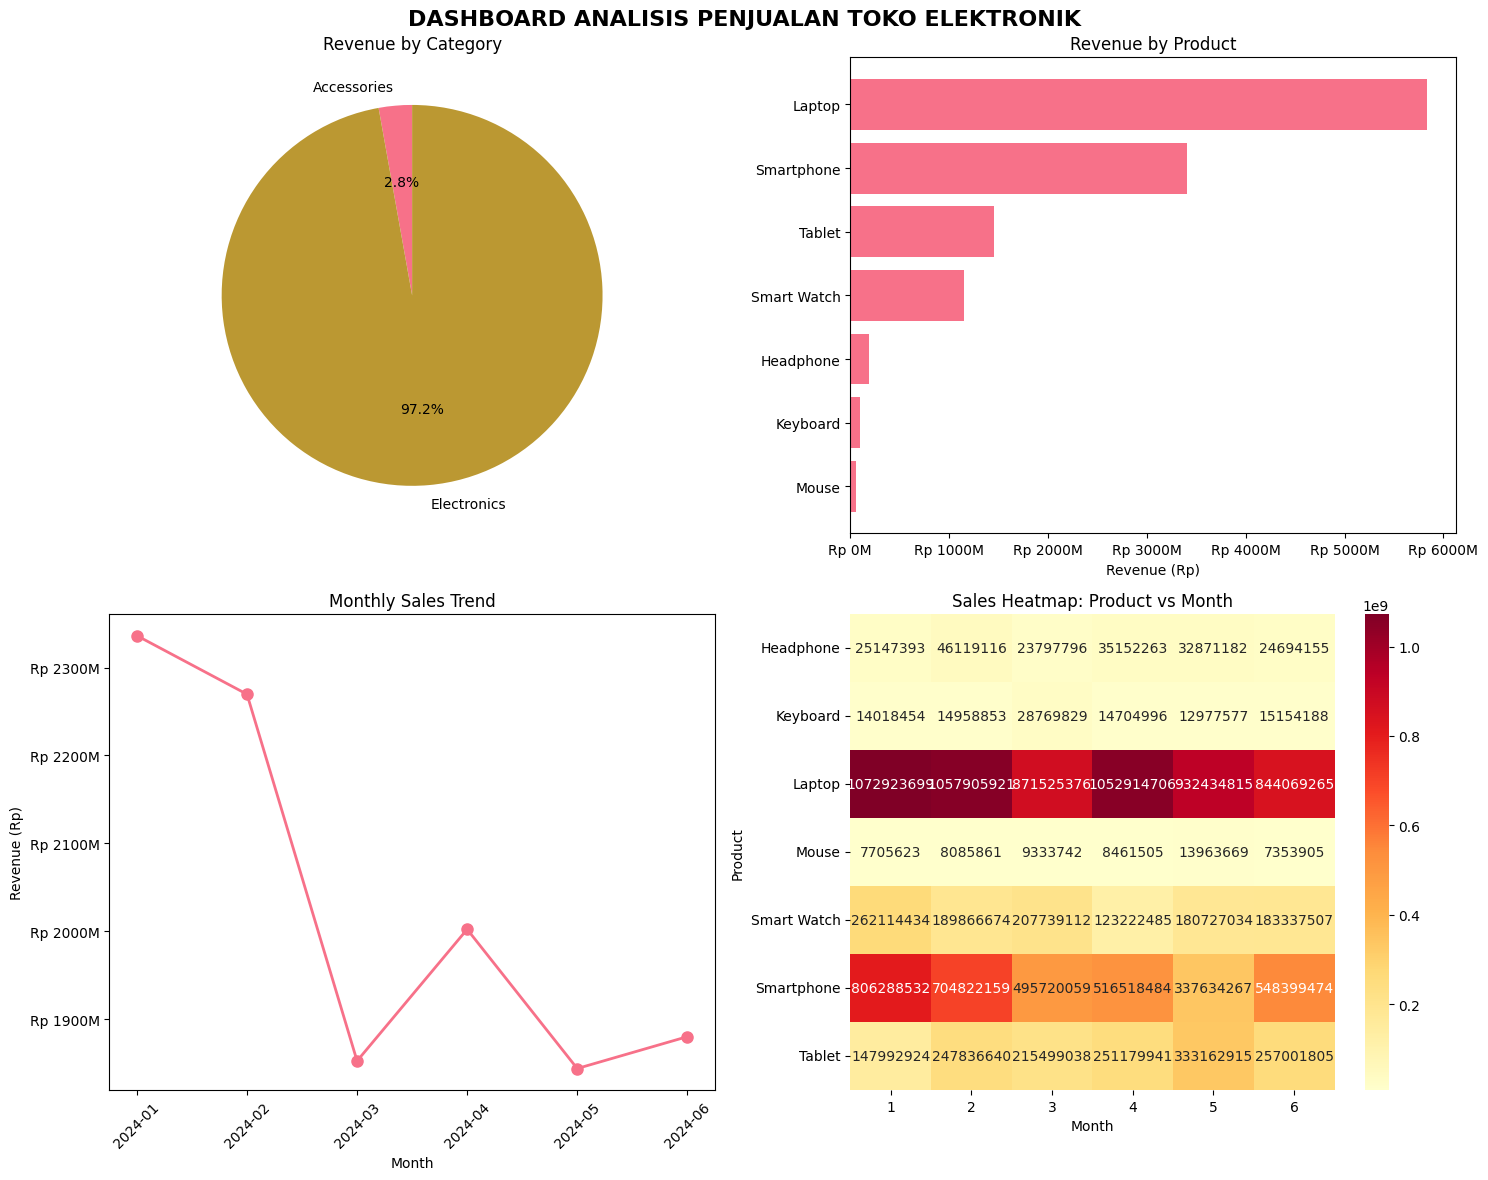


💡 INSIGHT DAN REKOMENDASI
🎯 KEY INSIGHTS:
1. Total Revenue: Rp 12,184,107,373
2. Produk Terlaris: Laptop
3. Bulan Terbaik: 2024-01
4. Rata-rata Transaksi: Rp 12,184,107

📋 REKOMENDASI BISNIS:
1. Fokus promosi pada kategori Electronics karena kontribusi revenue tertinggi
2. Tingkatkan stok produk best-seller menjelang akhir bulan
3. Buat bundle promo untuk produk accessories dengan electronics
4. Analisis lebih lanjut faktor penyebab fluktuasi penjualan bulanan

💾 MENYIMPAN HASIL ANALISIS
📊 SUMMARY REPORT:
Total Revenue: Rp 12,184,107,373
Total Transactions: 1000
Total Products Sold: 2626
Average Transaction Value: Rp 12,184,107
Best Selling Product: Laptop
Best Month: 2024-01

✅ Analisis selesai! Dataset memiliki 1000 transaksi yang siap untuk analisis lebih lanjut.
🔄 Anda bisa memodifikasi parameter atau menambah analisis sesuai kebutuhan.


In [12]:
# Setup untuk tampilan yang lebih baik
plt.style.use('default')
sns.set_palette("husl")

print("📊 ANALISIS DATA PENJUALAN TOKO ELEKTRONIK")
print("="*50)

# 2. MEMBUAT DATA SAMPLE
# Simulasi data penjualan selama 6 bulan
np.random.seed(42)

# Generate tanggal
start_date = datetime(2024, 1, 1)
dates = [start_date + timedelta(days=x) for x in range(180)]

# Data produk
products = ['Smartphone', 'Laptop', 'Tablet', 'Headphone', 'Smart Watch', 'Keyboard', 'Mouse']
categories = ['Electronics', 'Electronics', 'Electronics', 'Accessories', 'Electronics', 'Accessories', 'Accessories']
base_prices = [8000000, 15000000, 4000000, 500000, 3000000, 300000, 150000]

# Generate data penjualan
data = []
for i in range(1000):  # 1000 transaksi
    date = np.random.choice(dates)
    product_idx = np.random.randint(0, len(products))
    product = products[product_idx]
    category = categories[product_idx]
    base_price = base_prices[product_idx]

    # Tambah variasi harga ±20%
    price = base_price * np.random.uniform(0.8, 1.2)
    quantity = np.random.randint(1, 5)

    # Simulasi seasonal trend (penjualan lebih tinggi di akhir bulan)
    if date.day > 25:
        quantity = int(quantity * 1.5)

    total = price * quantity

    data.append({
        'date': date,
        'product': product,
        'category': category,
        'price': round(price, 0),
        'quantity': quantity,
        'total': round(total, 0)
    })

# Buat DataFrame
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()
df['week'] = df['date'].dt.isocalendar().week

print(f"✅ Data berhasil dibuat: {len(df)} transaksi")
print(f"📅 Periode: {df['date'].min().strftime('%d %B %Y')} - {df['date'].max().strftime('%d %B %Y')}")

# 3. EXPLORATORY DATA ANALYSIS (EDA)
print("\n" + "="*50)
print("📋 INFORMASI DASAR DATA")
print("="*50)

print("🔍 5 Data Teratas:")
print(df.head())

print("\n📊 Statistik Deskriptif:")
print(df.describe())

print(f"\n📈 Total Penjualan: Rp {df['total'].sum():,.0f}")
print(f"💰 Rata-rata per Transaksi: Rp {df['total'].mean():,.0f}")
print(f"🛍️ Total Produk Terjual: {df['quantity'].sum():,} unit")

# 4. ANALISIS BERDASARKAN KATEGORI
print("\n" + "="*50)
print("📊 ANALISIS BERDASARKAN KATEGORI")
print("="*50)

category_analysis = df.groupby('category').agg({
    'total': ['sum', 'mean', 'count'],
    'quantity': 'sum'
}).round(0)

category_analysis.columns = ['Total_Revenue', 'Avg_Transaction', 'Jumlah_Transaksi', 'Total_Unit']
print(category_analysis)

# 5. ANALISIS BERDASARKAN PRODUK
print("\n" + "="*50)
print("🏆 TOP 5 PRODUK TERLARIS")
print("="*50)

product_sales = df.groupby('product').agg({
    'total': 'sum',
    'quantity': 'sum'
}).sort_values('total', ascending=False)

print("Berdasarkan Revenue:")
for i, (product, data) in enumerate(product_sales.head().iterrows(), 1):
    print(f"{i}. {product}: Rp {data['total']:,.0f} ({data['quantity']:,} unit)")

# 6. TREND PENJUALAN BULANAN
print("\n" + "="*50)
print("📈 TREND PENJUALAN BULANAN")
print("="*50)

monthly_sales = df.groupby(df['date'].dt.to_period('M')).agg({
    'total': 'sum',
    'quantity': 'sum'
})

print("Penjualan per Bulan:")
for month, data in monthly_sales.iterrows():
    print(f"{month}: Rp {data['total']:,.0f} ({data['quantity']:,} unit)")

# 7. VISUALISASI DATA
print("\n" + "="*50)
print("📊 MEMBUAT VISUALISASI")
print("="*50)

# Setup figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('DASHBOARD ANALISIS PENJUALAN TOKO ELEKTRONIK', fontsize=16, fontweight='bold')

# 1. Pie Chart - Revenue by Category
category_revenue = df.groupby('category')['total'].sum()
axes[0,0].pie(category_revenue.values, labels=category_revenue.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Revenue by Category')

# 2. Bar Chart - Top Products
top_products = df.groupby('product')['total'].sum().sort_values(ascending=True).tail(7)
axes[0,1].barh(range(len(top_products)), top_products.values)
axes[0,1].set_yticks(range(len(top_products)))
axes[0,1].set_yticklabels(top_products.index)
axes[0,1].set_title('Revenue by Product')
axes[0,1].set_xlabel('Revenue (Rp)')

# Format x-axis labels
axes[0,1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'Rp {x/1e6:.0f}M'))

# 3. Line Chart - Monthly Trend
monthly_trend = df.groupby(df['date'].dt.to_period('M'))['total'].sum()
axes[1,0].plot(range(len(monthly_trend)), monthly_trend.values, marker='o', linewidth=2, markersize=8)
axes[1,0].set_title('Monthly Sales Trend')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Revenue (Rp)')
axes[1,0].set_xticks(range(len(monthly_trend)))
axes[1,0].set_xticklabels([str(x) for x in monthly_trend.index], rotation=45)
axes[1,0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'Rp {x/1e6:.0f}M'))

# 4. Heatmap - Sales by Product and Month
pivot_data = df.pivot_table(values='total', index='product',
                           columns=df['date'].dt.month, aggfunc='sum', fill_value=0)
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('Sales Heatmap: Product vs Month')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Product')

plt.tight_layout()
plt.show()

# 8. INSIGHT DAN REKOMENDASI
print("\n" + "="*50)
print("💡 INSIGHT DAN REKOMENDASI")
print("="*50)

# Hitung beberapa metrik penting
total_revenue = df['total'].sum()
best_product = df.groupby('product')['total'].sum().idxmax()
best_month = monthly_sales['total'].idxmax()
avg_transaction = df['total'].mean()

print("🎯 KEY INSIGHTS:")
print(f"1. Total Revenue: Rp {total_revenue:,.0f}")
print(f"2. Produk Terlaris: {best_product}")
print(f"3. Bulan Terbaik: {best_month}")
print(f"4. Rata-rata Transaksi: Rp {avg_transaction:,.0f}")

print("\n📋 REKOMENDASI BISNIS:")
print("1. Fokus promosi pada kategori Electronics karena kontribusi revenue tertinggi")
print("2. Tingkatkan stok produk best-seller menjelang akhir bulan")
print("3. Buat bundle promo untuk produk accessories dengan electronics")
print("4. Analisis lebih lanjut faktor penyebab fluktuasi penjualan bulanan")

# 9. EXPORT HASIL
print("\n" + "="*50)
print("💾 MENYIMPAN HASIL ANALISIS")
print("="*50)

# Summary report
summary_report = {
    'Total_Revenue': f"Rp {total_revenue:,.0f}",
    'Total_Transactions': len(df),
    'Total_Products_Sold': df['quantity'].sum(),
    'Average_Transaction_Value': f"Rp {avg_transaction:,.0f}",
    'Best_Selling_Product': best_product,
    'Best_Month': str(best_month)
}

print("📊 SUMMARY REPORT:")
for key, value in summary_report.items():
    print(f"{key.replace('_', ' ')}: {value}")

print(f"\n✅ Analisis selesai! Dataset memiliki {len(df)} transaksi yang siap untuk analisis lebih lanjut.")
print("🔄 Anda bisa memodifikasi parameter atau menambah analisis sesuai kebutuhan.")